<a href="https://colab.research.google.com/github/sean-halpin/chess_website/blob/models_init/models/Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Lichess Puzzles

In [95]:
import requests
import zstandard
import csv
import io

url = "https://database.lichess.org/lichess_db_puzzle.csv.zst"
compressed_file_path = "lichess_db_puzzle.csv.zst"
output_csv_path = "lichess_db_puzzle.csv"

# Download the Zstandard compressed file
response = requests.get(url)
if response.status_code == 200:
    with open(compressed_file_path, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully to {compressed_file_path}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Extract the Zstandard compressed file to CSV
with open(compressed_file_path, 'rb') as compressed_file:
    dctx = zstandard.ZstdDecompressor()
    with dctx.stream_reader(compressed_file) as reader:
        with io.TextIOWrapper(reader, encoding='utf-8') as text_reader:
            with open(output_csv_path, 'w', newline='', encoding='utf-8') as output_csv:
                writer = csv.writer(output_csv)

                for line in text_reader:
                    decoded_line = line.strip()
                    csv_row = decoded_line.split(',')
                    writer.writerow(csv_row)

print(f"File extracted successfully to {output_csv_path}")


File downloaded successfully to lichess_db_puzzle.csv.zst
File extracted successfully to lichess_db_puzzle.csv


# Load Puzzle Data

In [96]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "lichess_db_puzzle.csv"

# Use read_csv to load the data into a DataFrame
df = pd.read_csv(csv_file_path, sep=",")

# df_description = df.describe()

# # Print the summary
# print(df_description)

# Explore Data

In [99]:
# Display the first few rows of the DataFrame to verify the data has been loaded
pd.set_option('display.max_rows', None)
print(df.dtypes)
df.head(100)

PuzzleId           object
FEN                object
Moves              object
Rating              int64
RatingDeviation     int64
Popularity          int64
NbPlays             int64
Themes             object
GameUrl            object
OpeningTags        object
dtype: object


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1951,77,94,5235,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#Some(47),NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1470,75,96,25000,advantage endgame short,https://lichess.org/F8M8OS71#Some(52),NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1277,75,90,488,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#Some(126),NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1086,74,87,556,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#Some(31),Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,90,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#Some(104),NaN
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1380,75,93,516,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#Some(68),NaN
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1435,79,73,502,advantage master middlegame short,https://lichess.org/iihZGl6t#Some(28),Benoni_Defense Benoni_Defense_Benoni-Indian_De...
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1554,75,89,469,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#Some(37),Horwitz_Defense Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K...,e3g3 f7f4 e5f4 f8f4,1941,85,62,92,crushing middlegame short,https://lichess.org/8sVpuwso#Some(80),NaN
9,000qP,8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51,f2f1 f4f3 f1e1 c2c1 e1d2 c1g1,2146,75,97,154,crushing endgame exposedKing long skewer,https://lichess.org/r4xUR6fC#Some(100),NaN


In [100]:
print(df.dtypes)
df.describe()

PuzzleId           object
FEN                object
Moves              object
Rating              int64
RatingDeviation     int64
Popularity          int64
NbPlays             int64
Themes             object
GameUrl            object
OpeningTags        object
dtype: object


,Rating,RatingDeviation,Popularity,NbPlays
count,3.678110e+06,3.678110e+06,3.678110e+06,3.678110e+06
mean,1.523496e+03,9.049808e+01,8.335361e+01,1.606187e+03
std,5.391914e+02,4.411133e+01,2.177015e+01,4.309602e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.094000e+03,7.500000e+01,8.200000e+01,9.100000e+01
50%,1.487000e+03,7.700000e+01,8.900000e+01,3.580000e+02
75%,1.923000e+03,8.800000e+01,9.300000e+01,1.277000e+03
max,3.328000e+03,5.000000e+02,1.020000e+02,1.007610e+06


In [101]:
pd.set_option('display.max_columns', None)

In [106]:
print(df.iloc[84]['FEN'])
print(df.iloc[84]['Moves'])

r5k1/2p1pp2/pp4p1/1q1r4/5P2/2QP2R1/PP6/1K4R1 b - - 0 32
d5h5 g3g6 f7g6 g1g6 g8f7 c3g7 f7e8 g7g8 e8d7 g8e6 d7d8 g6g8


In [107]:
# Select only the FEN and moves columns
selected_columns = ["FEN", "Moves"]
df_subset = df[selected_columns]

In [108]:
df_subset.head()

,FEN,Moves
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4
4,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6


In [110]:
df_subset.iloc[84]

FEN      r5k1/2p1pp2/pp4p1/1q1r4/5P2/2QP2R1/PP6/1K4R1 b...
Moves    d5h5 g3g6 f7g6 g1g6 g8f7 c3g7 f7e8 g7g8 e8d7 g...
Name: 84, dtype: object

In [ ]:
pip install python-chess

In [111]:
def move_to_index(move):
    """
    Convert chess move (e.g., "e2e4") to index number based on the specified mapping.
    """
    file_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    rank_mapping = {str(i+1): i * 8 for i in range(8)}

    start_square = move[:2]
    end_square = move[2:]

    start_index = file_mapping[start_square[0]] + rank_mapping[start_square[1]]
    end_index = file_mapping[end_square[0]] + rank_mapping[end_square[1]]

    return start_index, end_index

In [158]:
import chess

# Iterate through each row in the DataFrame
for index, row in df_subset.head(1).iterrows():
    # Get the FEN string from the current row
    fen_string = row["FEN"]

    # Create a chess.Board object from the FEN string
    board = chess.Board(fen_string)

    for move in row["Moves"].split(" "):
      # Print the board state and moves
      print(move, "\n")
      print(f"Board state for puzzle {index + 1} (FEN: {board.board_fen()}):")
      print(board)
      print("Moves:", row["Moves"])
      print("\n" + "=" * 30 + "\n")
      # Extract and print the piece at each square
      i=0
      for square in chess.SQUARES:
          piece = board.piece_at(square)
          print(f"{i} - Square {chess.square_name(square)}: {piece}")
          i+=1
      print(move_to_index(move))
      m = chess.Move.from_uci(move)
      board.push(m)  # Make the move
      break


f2g3 

Board state for puzzle 1 (FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K):
r . . . . . . k
p p . . r . . p
. . . . R p . Q
. . . p . . . .
. . . . . . . .
. N . P . . R .
P q P . . b P P
. . . . . . . K
Moves: f2g3 e6e7 b2b1 b3c1 b1c1 h6c1


0 - Square a1: None
1 - Square b1: None
2 - Square c1: None
3 - Square d1: None
4 - Square e1: None
5 - Square f1: None
6 - Square g1: None
7 - Square h1: K
8 - Square a2: P
9 - Square b2: q
10 - Square c2: P
11 - Square d2: None
12 - Square e2: None
13 - Square f2: b
14 - Square g2: P
15 - Square h2: P
16 - Square a3: None
17 - Square b3: N
18 - Square c3: None
19 - Square d3: P
20 - Square e3: None
21 - Square f3: None
22 - Square g3: R
23 - Square h3: None
24 - Square a4: None
25 - Square b4: None
26 - Square c4: None
27 - Square d4: None
28 - Square e4: None
29 - Square f4: None
30 - Square g4: None
31 - Square h4: None
32 - Square a5: None
33 - Square b5: None
34 - Square c5: None
35 - Square d5: p
36 - Square e5: None
37 - Square f5: N

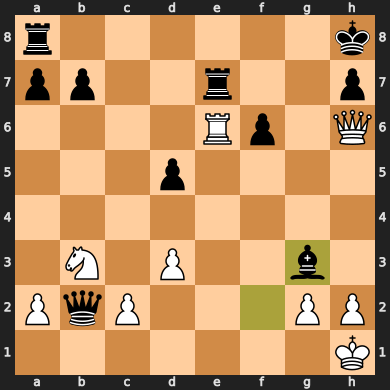

In [159]:
board

In [179]:
print(dir(board.piece_at(15)))
print(board.piece_at(15).piece_type)
print(board.piece_at(22).color)
print(board.piece_at(22).symbol())

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_svg_', 'color', 'from_symbol', 'piece_type', 'symbol', 'unicode_symbol']
1
False
b


In [185]:
print(board.piece_at(44).__str__())
print(board.piece_at(0).__str__())

R
None


# Prepare Data

In [154]:
sample_count = 50000
sampled_df = df_subset.sample(n=50000, random_state=42)

In [186]:
# Create an empty list to store row data
rows_data = []

i=0
# Iterate through each row in the DataFrame
for index, row in sampled_df.iterrows():
    # Get the FEN string from the current row
    fen_string = row["FEN"]

    # Create a chess.Board object from the FEN string
    try:
        board = chess.Board(fen_string)
    except:
        print("An exception occurred")
        continue

    for move in row["Moves"].split(" "):
        try:
            move_src, move_dest = move_to_index(move)
        except:
            print(move, fen_string, "\n", index, "\n", row)
            continue

        # Extract the piece at each square and append to row_data
        row_data = [board.piece_at(square).__str__() for square in chess.SQUARES]

        # Append the move index to row_data
        row_data.extend([move_src, move_dest])

        # Make the move on the board
        m = chess.Move.from_uci(move)
        board.push(m)

        # Append the row_data to the list
        rows_data.append(row_data)
    i+=1
    if i % 5000 == 0:
      print(f"{i} of {sample_count}")

# Create the result DataFrame in a single step
columns = [f"Square_{i}" for i in range(64)] + ["move_src", "move_dest"]
result_df = pd.DataFrame(rows_data, columns=columns)

5000 of 50000
10000 of 50000
15000 of 50000
20000 of 50000
25000 of 50000
30000 of 50000
35000 of 50000
40000 of 50000
45000 of 50000
50000 of 50000


In [187]:
result_df.head(2)

,Square_0,Square_1,Square_2,Square_3,Square_4,Square_5,Square_6,Square_7,Square_8,Square_9,Square_10,Square_11,Square_12,Square_13,Square_14,Square_15,Square_16,Square_17,Square_18,Square_19,Square_20,Square_21,Square_22,Square_23,Square_24,Square_25,Square_26,Square_27,Square_28,Square_29,Square_30,Square_31,Square_32,Square_33,Square_34,Square_35,Square_36,Square_37,Square_38,Square_39,Square_40,Square_41,Square_42,Square_43,Square_44,Square_45,Square_46,Square_47,Square_48,Square_49,Square_50,Square_51,Square_52,Square_53,Square_54,Square_55,Square_56,Square_57,Square_58,Square_59,Square_60,Square_61,Square_62,Square_63,move_src,move_dest
0,None,K,None,R,None,None,None,None,None,P,P,None,P,None,None,None,P,None,None,None,P,None,P,None,None,None,None,None,None,None,None,P,None,None,None,None,k,p,None,p,None,None,None,None,None,None,p,None,p,B,None,None,None,None,None,None,None,None,None,r,r,None,None,None,1,2
1,None,None,K,R,None,None,None,None,None,P,P,None,P,None,None,None,P,None,None,None,P,None,P,None,None,None,None,None,None,None,None,P,None,None,None,None,k,p,None,p,None,None,None,None,None,None,p,None,p,B,None,None,None,None,None,None,None,None,None,r,r,None,None,None,59,3


# Create Model

In [ ]:
!pip install torch pandas scikit-learn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
# Extracting X and Y
X = result_df.iloc[:, :64].values
Y = result_df.iloc[:, 64:].values

# Convert 'None', 'Pawn', 'Rook', 'Knight', 'Bishop', 'Queen', 'King' to numerical values
label_encoder = LabelEncoder()
X_encoded = label_encoder.fit_transform(X.flatten()).reshape(X.shape)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X_encoded, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Define a simple CNN model for regression
class ChessCNN(nn.Module):
    def __init__(self):
        super(ChessCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = x.view(-1, 1, 64)  # Reshape input for 1D convolution
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = ChessCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
batch_size = 32

train_dataset = data.TensorDataset(X_train, Y_train)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'chess_cnn_model.pth')

Epoch [1/10], Loss: 251.8981
Epoch [2/10], Loss: 206.1223
Epoch [3/10], Loss: 232.3484
Epoch [4/10], Loss: 301.2396
Epoch [5/10], Loss: 216.4716
Epoch [6/10], Loss: 173.4281
Epoch [7/10], Loss: 267.8561


In [ ]:
correct_predictions = 0

with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)

    # Count correct predictions
    for i in range(len(Y_test)):
        predicted_labels = test_outputs[i].numpy()
        true_labels = Y_test[i].numpy()
        if i == 1:
          print(predicted_labels, true_labels)
        if (predicted_labels == true_labels).all():
            correct_predictions += 1

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Number of correct predictions: {correct_predictions}/{len(Y_test)}')
